## importing all the libraries required for the Linear Regression



# Linear Regression :

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Dataset 

In [4]:
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [5]:
df = pd.read_csv("BostonHousing.csv")

In [6]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [8]:
prices = df['medv']
features = df.drop('medv',axis = 1)

Calculation for Minumum, Maximum, Mean, Median, Standard deviation of prices :

In [10]:
# Calculation  of Minimum price
minimum_price = np.mean(prices)
# Calculation of Maximum price 
maximum_price = np.max(prices)
# Calculation of Mean price
mean_price = np.mean(prices)
# Calculation of Median price
median_price = np.median(prices)
# Calculatoin of Standard deviation 
std_price = np.std(prices)
# To show aboce calculated values 

print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $22.53
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19


Pre-Processing on the data;
Missing Value / Data Type / correlation

In [12]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [14]:
cor = df.corr()

In [15]:
cor

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Correlation Visualiazation using heatmap 

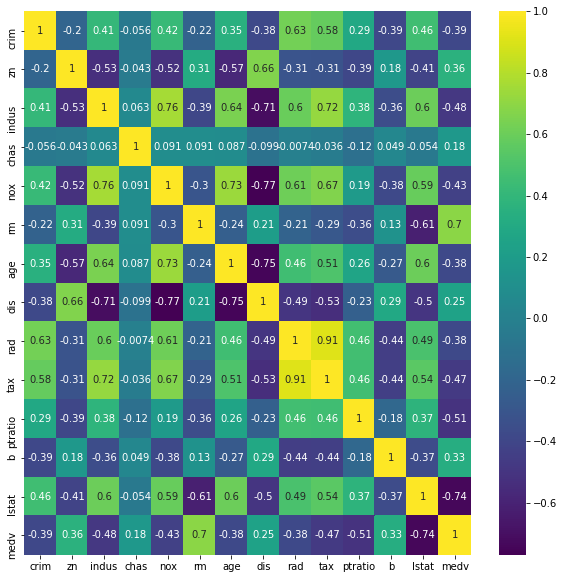

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

Scatter Plot for rm and medv  :

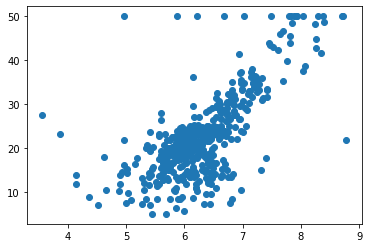

In [19]:
plt.figure()
plt.scatter(df["rm"],df["medv"])
plt.show()

Scatter Plot for lstat and medv  :

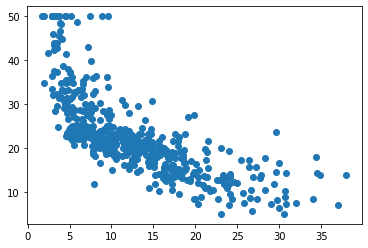

In [22]:
plt.figure()
plt.scatter(df["lstat"],df["medv"])
plt.show()

Scatter Plot for ptratio and medv  :

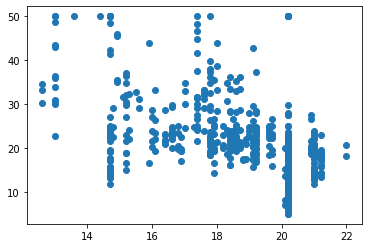

In [23]:
plt.figure()
plt.scatter(df["ptratio"],df["medv"])
plt.show()

Seprating the target and features :

In [30]:
X = df[["rm"]]
y = df["medv"]

Seprate training and testing data :

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [33]:
model = LinearRegression()

 ols : oridinary least Square
 theta1 = sum(x-xbar)(y-ybar)/(x-xbar)2
 theta0 = y - theta1x


In [34]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
model.intercept_

-30.571032410898336

In [36]:
model.coef_

array([8.46109164])

In [38]:
y_pred = model.predict(X_test)

Model Evaluation  :  Mean Squared Error & Root of mse & R2 Score

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
mse  = mean_squared_error(y_test,y_pred)

In [41]:
mse

36.517214730838624

In [44]:
rmse = np.sqrt(mse)

In [45]:
rmse

6.042947520112898

In [42]:
r2 = r2_score(y_test,y_pred)

In [43]:
r2

0.6015774471545622

Output values of mse  / rmse and r2 :

In [46]:
print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

mse: 36.517214730838624, rmse: 6.042947520112898, r2: 0.6015774471545622


Plotting the model :

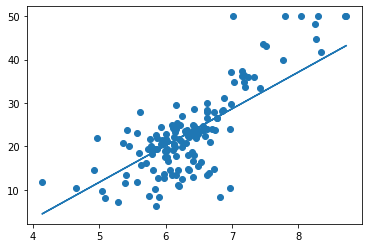

In [47]:
plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.show()

Now , for ltest and medv column :

In [51]:
X = df[["lstat"]]
y = df["medv"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [49]:
model = LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))


34.22183685037717
[-0.9166916]
mse: 42.62024347153971, rmse: 6.528418144661057, r2: 0.5349901044757204


Plotting the Model :

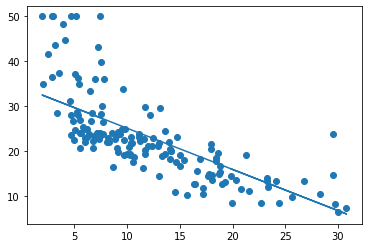

In [50]:
plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.show()

Now , for ptratio and medv column :

In [53]:
X = df[["ptratio"]]
y = df["medv"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [55]:
model = LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

61.728347935790936
[-2.13474825]
mse: 68.41481947991122, rmse: 8.27132513445767, r2: 0.2535573364354444


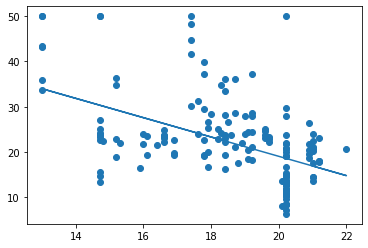

In [56]:
plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.show()

# Multiple Linear Regression :

In [57]:
X = df[["rm","lstat","ptratio"]]
y = df["medv"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [59]:
model = LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

25.373484464182265
[ 3.52839125 -0.60681801 -0.93396631]
mse: 25.40090941218404, rmse: 5.039931488838319, r2: 0.7228623473287099


In [64]:
# # multi-dimentional plotting trick : y_pred and residual (assumption : linearity)
residual = y_test - y_pred

In [61]:
residual

307    0.414884
343   -4.304832
47    -1.923508
67    -1.546179
362    1.556877
         ...   
467    4.349062
95     0.497657
122    2.812779
260    0.972460
23     0.292812
Name: medv, Length: 152, dtype: float64

Scatter plot of y_pred & residual :

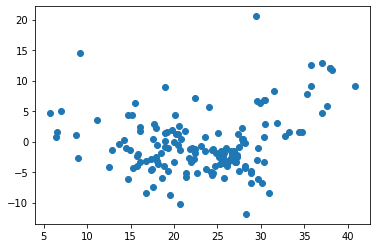

In [62]:
plt.figure()
plt.scatter(y_pred,residual)
plt.show()

Residual Histogram : (assumption : normal distribution)

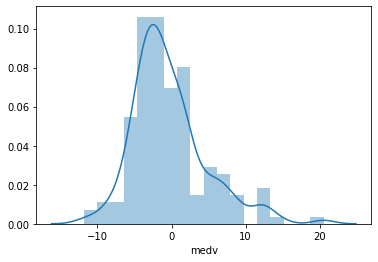

In [63]:
plt.figure()
sns.distplot(residual)
plt.show()

# Polynomial Regression :

In [70]:
from sklearn.preprocessing import PolynomialFeatures

In [71]:
poly = PolynomialFeatures(2)

In [72]:
X = df[["rm","lstat"]]
y = df["medv"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [74]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [75]:
model = LinearRegression()

In [76]:
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

In [77]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))
residual = y_test - y_pred

mse: 16.91540677390628, rmse: 4.112834396606102, r2: 0.8154437681254126


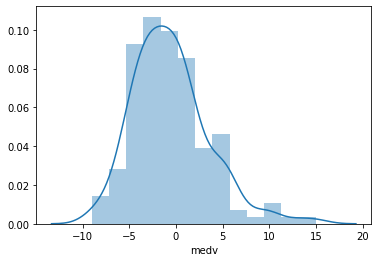

In [78]:
plt.figure()
sns.distplot(residual)
plt.show()